In [36]:
import numpy as np
import pandas as pd

y = [200 if i % 2 == 0 else 150 for i in range(50)]
y += [0 if i % 2 == 0 else 150 for i in range(50)]
data = pd.DataFrame(y, columns=['y'])

z = [250 if i % 2 == 0 else 170 for i in range(50)]
z += [200 if i % 2 == 0 else 150 for i in range(50)]
data['z'] = pd.Series(z)
# data.loc[0:50, 'y'] = 22
# data.loc[51, 'y'] = 255
# data.loc[52:100, 'y'] = 100
# data.loc[52:100, 'z'] = 1
data = data.reset_index()
data = data.rename(columns={'index':'x'})
data

,x,y,z
0,0,200,250
1,1,150,170
2,2,200,250
3,3,150,170
4,4,200,250
...,...,...,...
95,95,150,150
96,96,0,200
97,97,150,150
98,98,0,200


In [11]:
import matplotlib.pyplot as plt  # for display purposes
import ruptures as rpt  # our package

# n_samples, n_dims, sigma = 1000, 1, 2
# n_bkps = 4  # number of breakpoints
# signal, bkps = rpt.pw_constant(n_samples, n_dims, n_bkps, noise_std=sigma)

# detection
signal = np.array([[i] for i in data['y']])
algo = rpt.Dynp(model="l2", min_size=1, jump=1).fit(signal)
result = algo.predict(n_bkps=1)
print(result)

[51, 100]


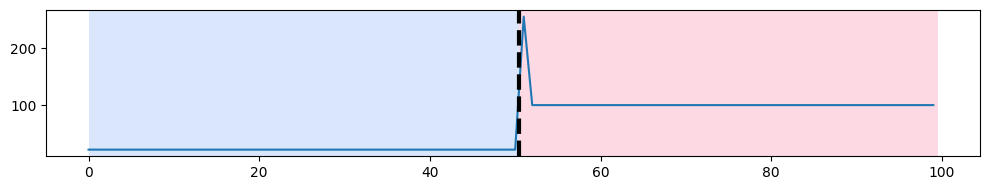

In [13]:
rpt.display(signal, result, result)
plt.show()

In [37]:
signal = np.array([[y,z] for y,z in data[['y', 'z']].values])
algo = rpt.Dynp(model="l2", min_size=1, jump=1).fit(signal)
result = algo.predict(n_bkps=2)
print(result)

[50, 51, 100]


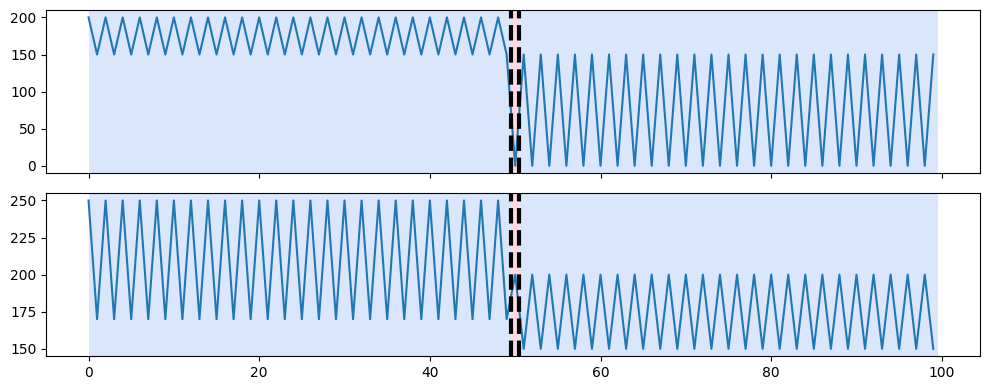

In [38]:
rpt.display(signal, result, result)
plt.show()

In [ ]:
import statsmodels.formula.api as smapi
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(data['y'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(data['y'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [ ]:
self.result = False
if ('packname' in self.text_analysis_model.alias_data['PackageName'].res_key_value) & ('errorname' in self.text_analysis_model.alias_data['ErrorName'].res_key_value):
    for item in self.text_analysis_model.alias_data['ErrorName'].res_key_value['errorname']['timestamp']:
        if self.text_analysis_model.alias_data['PackageName'].res_key_value['packname']['timestamp'][0] > item:
            self.result = True        
else:
    self.result = 'unknow'

In [ ]:
table = self.text_analysis_model.batch_statistic_model.table
tt = table.loc[(table['BeforeError'] == True) & (table['AfterError'] == False),:]
self.result = len(tt) / len(table)

In [ ]:
self.text_analysis_model.batch_statistic_model.table.to_csv('D:\\projects\\ericsson_flow\\test.csv', index=False)

In [ ]:
self.result = False
high_count = 0
low_count = 0
for v in self.text_analysis_model.alias_data['search_branchI'].res_key_value['txAtt']['value']:
    if v >= 255:
        high_count = high_count + 1
        
    if v <= 50:
        low_count = low_count + 1
if (high_count > 3) & (low_count > 3):
    self.result = True

In [ ]:
self.result = False
if len(self.text_analysis_model.alias_data['Deframer_interrupt_happened'].res_lines) > 0:
    self.result = True

In [ ]:
self.result = False
if (self.text_analysis_model.alias_data['branchI_txatt_bas'].result == True) | (self.text_analysis_model.alias_data['branchJ_txatt_bas'].result == True) | (self.text_analysis_model.alias_data['branchK_txatt_bas'].result == True) | (self.text_analysis_model.alias_data['branchL_txatt_bas'].result == True):
    self.result = True

In [ ]:
self.result = False
if (self.text_analysis_model.alias_data['branchI_txatt_bas'].result == True) & (self.text_analysis_model.alias_data['branchJ_txatt_bas'].result == True) & (self.text_analysis_model.alias_data['branchK_txatt_bas'].result == True) & (self.text_analysis_model.alias_data['branchL_txatt_bas'].result == True):
    self.result = True

In [ ]:
import socketio
sio = socketio.AsyncClient(reconnection=False)
await sio.connect('http://127.0.0.1:8000', namespaces=['/TextAnalysis/FileContainer'])

In [ ]:
await sio.emit('new_file', ['D:\\Projects\\ericsson_flow\\new_files\\E55G948878_LE_SARONGGE_BXP_6_telog.log'], namespace='/TextAnalysis/FileContainer')

In [ ]:
await sio.emit('load_config', 'D:\\projects\\ericsson_flow\\new_files\\config1.txt', namespace='/TextAnalysis/FileContainer')

In [ ]:
# await sio.disconnect
sio = socketio.AsyncClient(reconnection=False)
await sio.connect('http://127.0.0.1:8000', namespaces=['/TextAnalysis/FileContainer', '/TextAnalysis/FileContainer/E55G948878_LE_SARONGGE_BXP_6_telog.log/TextFileFunction/SearchFunction/search_branchA'])

In [ ]:
def printm(model):
    print(model)

await sio.emit('model', namespace='/TextAnalysis/FileContainer/E55G948878_LE_SARONGGE_BXP_6_telog.log/TextFileFunction/SearchFunction/search_branchA', callback=printm)